In [1]:
# Referenced from https://github.com/DL4mHealth/COMET/blob/main/data_preprocessing/PTB/PTB_preprocessing.ipynb
import os
import pandas as pd
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from datautils import normalize, resample, R_Peaks, trial2sample, sample2trial

In [15]:
# specify the root path
root_path = '../ptb-diagnostic-ecg-database-1.0.0'

In [16]:
# only select the patients with myocardial infarction disease label
li_slc_sub = []
for sub in os.listdir(root_path):
    sub_path = os.path.join(root_path, sub)
    if os.path.isdir(sub_path):
        for tri in os.listdir(sub_path):
            if '.dat' in tri:
                tri_path = os.path.join(sub_path, tri)
                label = wfdb.rdsamp(record_name=tri_path[:-4])[1]['comments'][4].split(':')[-1].strip()
                if (label == 'Myocardial infarction')|(label == 'Healthy control'):
                    li_slc_sub.append(sub_path)
                    break

print(len(li_slc_sub))
li_slc_sub

200


['../ptb-diagnostic-ecg-database-1.0.0/patient015',
 '../ptb-diagnostic-ecg-database-1.0.0/patient012',
 '../ptb-diagnostic-ecg-database-1.0.0/patient024',
 '../ptb-diagnostic-ecg-database-1.0.0/patient229',
 '../ptb-diagnostic-ecg-database-1.0.0/patient211',
 '../ptb-diagnostic-ecg-database-1.0.0/patient023',
 '../ptb-diagnostic-ecg-database-1.0.0/patient048',
 '../ptb-diagnostic-ecg-database-1.0.0/patient083',
 '../ptb-diagnostic-ecg-database-1.0.0/patient077',
 '../ptb-diagnostic-ecg-database-1.0.0/patient245',
 '../ptb-diagnostic-ecg-database-1.0.0/patient242',
 '../ptb-diagnostic-ecg-database-1.0.0/patient070',
 '../ptb-diagnostic-ecg-database-1.0.0/patient084',
 '../ptb-diagnostic-ecg-database-1.0.0/patient079',
 '../ptb-diagnostic-ecg-database-1.0.0/patient274',
 '../ptb-diagnostic-ecg-database-1.0.0/patient046',
 '../ptb-diagnostic-ecg-database-1.0.0/patient280',
 '../ptb-diagnostic-ecg-database-1.0.0/patient287',
 '../ptb-diagnostic-ecg-database-1.0.0/patient041',
 '../ptb-dia

In [17]:
# get median R-Peak intervals for all trials, drop trials that contains nan or all zero
med_intervals = []
med_intervals = []
abnormal_trial = []
nan_trial = []
allzero_trial = []
for sub_path in li_slc_sub:
    for tri in os.listdir(sub_path):
        if '.dat' in tri:
            tri_path = os.path.join(sub_path, tri)
            ecg_data = wfdb.rdsamp(record_name=tri_path[:-4])[0]
            if np.all(ecg_data == 0):
                allzero_trial.append(tri_path)
                print(f'All zero: {tri_path}')
                continue
            if np.any(np.isnan(ecg_data)):
                nan_trial.append(tri_path)
                print(f'Nan: {tri_path}')
                continue
            trial = []
            for ch in range(ecg_data.shape[1]):
                data = resample(ecg_data[:,ch], freq1=1000, freq2=250, kind='linear')
                trial.append(data)
            trial = np.array(trial).T
            trial_norm = normalize(trial)
            try:
                _, med, _ = R_Peaks(trial_norm)
                med_intervals.append(med.to_list())
            except IndexError:
                print(f'The trial is invalid with trial path {tri_path}')
                abnormal_trial.append(tri_path)
                pass
            
print(len(abnormal_trial), len(nan_trial), len(allzero_trial))
df_med_intervals = pd.DataFrame(med_intervals).T
df_med_intervals

0 0 0


,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,224.0,181.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,263.0,...,240.0,238.0,251.0,243.0,229.0,196.0,286.5,275.0,259.0,162.0
1,224.0,181.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,251.5,243.0,229.0,196.0,287.0,275.0,259.0,162.0
2,225.0,182.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,251.0,244.0,229.0,196.0,287.0,275.0,259.0,162.0
3,224.0,181.0,131.0,237.0,286.0,235.0,232.0,192.0,236.0,262.0,...,240.0,240.0,254.0,243.0,229.0,196.0,287.0,275.0,258.0,162.0
4,224.0,181.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,251.0,243.0,229.0,196.0,286.5,275.0,259.0,162.0
5,224.0,181.0,131.0,237.0,286.5,235.0,129.0,136.0,136.0,262.5,...,240.0,238.0,252.0,243.0,229.0,196.0,287.5,275.0,259.0,162.0
6,224.0,181.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,251.5,243.5,229.0,196.0,287.0,275.0,258.0,162.0
7,224.0,181.0,131.0,237.0,134.5,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,252.0,243.5,229.0,196.0,286.0,275.0,258.0,162.0
8,224.0,181.0,131.0,237.0,287.0,236.0,233.5,192.0,236.0,262.0,...,240.0,238.0,252.0,243.0,229.0,196.0,287.0,275.0,258.0,162.0
9,224.0,181.0,131.0,237.0,287.0,4097.0,904.5,192.0,1432.0,262.0,...,240.0,238.0,251.5,243.0,229.0,196.0,287.0,275.0,258.0,162.0


In [18]:
# 438 records suitable for analysis
all_med = df_med_intervals.median()
print(all_med[all_med<=300].shape)
print(all_med[all_med<=300].max())
max_duration = 300

(438,)
295.0


In [19]:
# remove records that have median interval length greater than max duration
med_intervals = []
abnormal_trial = []
med_nan_trial = []
drop_trial = nan_trial + allzero_trial
for sub_path in li_slc_sub:
    for tri in os.listdir(sub_path):
        if '.dat' in tri:
            tri_path = os.path.join(sub_path, tri)
            if tri_path in drop_trial:
                continue
            ecg_data = wfdb.rdsamp(record_name=tri_path[:-4])[0]
            trial = []
            for ch in range(ecg_data.shape[1]):
                data = resample(ecg_data[:,ch], freq1=1000, kind='linear')
                trial.append(data)
            trial = np.array(trial).T
            trial_norm = normalize(trial)
            try:
                _, med, _ = R_Peaks(trial_norm)
                if med.median() <= max_duration:
                    if np.any(np.isnan(med)):
                        med_nan_trial.append(tri_path)
                        print(f'Med Nan: {tri_path}')
                        continue 
                    med_intervals.append(med.to_list())
                else:
                    print(f'The trial is an outlier with trial path {tri_path}')
                    abnormal_trial.append(tri_path)
            except IndexError:
                print(f'The trial is invalid with trial path {tri_path}')
                abnormal_trial.append(tri_path)
                pass
            
print(len(abnormal_trial), len(med_nan_trial))
df_med_intervals = pd.DataFrame(med_intervals).T
df_med_intervals

The trial is an outlier with trial path ../ptb-diagnostic-ecg-database-1.0.0/patient023/s0103lre.dat
The trial is an outlier with trial path ../ptb-diagnostic-ecg-database-1.0.0/patient023/s0085lre.dat
The trial is an outlier with trial path ../ptb-diagnostic-ecg-database-1.0.0/patient273/s0511_re.dat
The trial is an outlier with trial path ../ptb-diagnostic-ecg-database-1.0.0/patient085/s0298lre.dat
The trial is an outlier with trial path ../ptb-diagnostic-ecg-database-1.0.0/patient085/s0297lre.dat
Med Nan: ../ptb-diagnostic-ecg-database-1.0.0/patient082/s0271lre.dat
Med Nan: ../ptb-diagnostic-ecg-database-1.0.0/patient082/s0267lre.dat
Med Nan: ../ptb-diagnostic-ecg-database-1.0.0/patient082/s0279lre.dat
Med Nan: ../ptb-diagnostic-ecg-database-1.0.0/patient160/s0222_re.dat
Med Nan: ../ptb-diagnostic-ecg-database-1.0.0/patient193/s0008_re.dat
Med Nan: ../ptb-diagnostic-ecg-database-1.0.0/patient036/s0126lre.dat
Med Nan: ../ptb-diagnostic-ecg-database-1.0.0/patient039/s0134lre.dat
The t

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,224.0,181.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,263.0,...,240.0,238.0,251.0,243.0,229.0,196.0,286.5,275.0,259.0,162.0
1,224.0,181.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,251.5,243.0,229.0,196.0,287.0,275.0,259.0,162.0
2,225.0,182.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,251.0,244.0,229.0,196.0,287.0,275.0,259.0,162.0
3,224.0,181.0,131.0,237.0,286.0,235.0,232.0,192.0,236.0,262.0,...,240.0,240.0,254.0,243.0,229.0,196.0,287.0,275.0,258.0,162.0
4,224.0,181.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,251.0,243.0,229.0,196.0,286.5,275.0,259.0,162.0
5,224.0,181.0,131.0,237.0,286.5,235.0,129.0,136.0,136.0,262.5,...,240.0,238.0,252.0,243.0,229.0,196.0,287.5,275.0,259.0,162.0
6,224.0,181.0,131.0,237.0,287.0,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,251.5,243.5,229.0,196.0,287.0,275.0,258.0,162.0
7,224.0,181.0,131.0,237.0,134.5,235.0,232.0,192.0,236.0,262.0,...,240.0,238.0,252.0,243.5,229.0,196.0,286.0,275.0,258.0,162.0
8,224.0,181.0,131.0,237.0,287.0,236.0,233.5,192.0,236.0,262.0,...,240.0,238.0,252.0,243.0,229.0,196.0,287.0,275.0,258.0,162.0
9,224.0,181.0,131.0,237.0,287.0,4097.0,904.5,192.0,1432.0,262.0,...,240.0,238.0,251.5,243.0,229.0,196.0,287.0,275.0,258.0,162.0


In [20]:
# main
feature_path = '../dataset/ptb/feature'
if not os.path.exists(feature_path):
    os.makedirs(feature_path)

dict_label = {}
sub_id = 1
drop_trial = drop_trial + abnormal_trial + med_nan_trial
for sub_path in li_slc_sub:
    li_sub_segs = []
    for tri in os.listdir(sub_path):
        if 'dat' in tri:
            tri_path = os.path.join(sub_path, tri)
            if tri_path in drop_trial:
                continue
            label = wfdb.rdsamp(record_name=tri_path[:-4])[1]['comments'][4].split(':')[-1].strip() # label
            if label == 'Myocardial infarction':
                dict_label[sub_id] = 1
            if label == 'Healthy control':
                dict_label[sub_id] = 0
            ecg_data = wfdb.rdsamp(record_name=tri_path[:-4])[0] # data
            trial = []
            for ch in range(ecg_data.shape[1]):
                data = resample(ecg_data[:,ch], freq1=1000, freq2=250, kind='linear')
                trial.append(data)
            trial = np.array(trial).T
            trial_norm = normalize(trial)
            samples = trial2sample(trial_norm, max_duration=300)
            segmentations = sample2trial(samples, size=10) # all segmentations of a trial
            for seg in segmentations:
                li_sub_segs.append(seg)
                    
    if li_sub_segs != list(): # Not None list
        array_sub = np.array(li_sub_segs)
        print(array_sub.shape)
        np.save(os.path.join(feature_path, f'feature_{sub_id:05d}'), array_sub)
        sub_id += 1
    else:
        print(f'The subject is None after preprocessing with the path {tri_path}')              

(49, 3000, 15)
(32, 3000, 15)
(72, 3000, 15)
(23, 3000, 15)
(21, 3000, 15)
(25, 3000, 15)
(59, 3000, 15)
(57, 3000, 15)
(71, 3000, 15)
(27, 3000, 15)
(14, 3000, 15)
(15, 3000, 15)
(53, 3000, 15)
(65, 3000, 15)
(11, 3000, 15)
(70, 3000, 15)
(12, 3000, 15)
(36, 3000, 15)
(65, 3000, 15)
The subject is None after preprocessing with the path ../ptb-diagnostic-ecg-database-1.0.0/patient273/s0511_re.dat
(34, 3000, 15)
(39, 3000, 15)
(48, 3000, 15)
(45, 3000, 15)
(12, 3000, 15)
(57, 3000, 15)
(54, 3000, 15)
(40, 3000, 15)
(27, 3000, 15)
(12, 3000, 15)
(18, 3000, 15)
(61, 3000, 15)
(14, 3000, 15)
(69, 3000, 15)
(11, 3000, 15)
(11, 3000, 15)
(10, 3000, 15)
(14, 3000, 15)
(11, 3000, 15)
(15, 3000, 15)
(12, 3000, 15)
(17, 3000, 15)
(14, 3000, 15)
(23, 3000, 15)
(13, 3000, 15)
The subject is None after preprocessing with the path ../ptb-diagnostic-ecg-database-1.0.0/patient160/s0222_re.dat
(27, 3000, 15)
The subject is None after preprocessing with the path ../ptb-diagnostic-ecg-database-1.0.0/pati

In [21]:
len(dict_label)

194

In [22]:
# label.npy
label_path = '../dataset/ptb/label'
if not os.path.exists(label_path):
    os.makedirs(label_path)

df_label = pd.DataFrame([dict_label]).T
df_label = df_label.reset_index().astype('int64')
labels = df_label[[0, 'index']].values
np.save(os.path.join(label_path, 'label'), labels)

In [27]:
# test
sig = np.load('../dataset/ptb/feature/feature_00100.npy')
sig

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

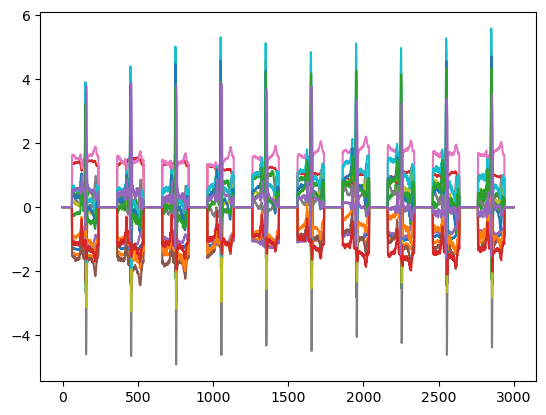

In [30]:
plt.plot(sig[0])

In [2]:
labs = np.load('../dataset/ptb/label/label.npy')

In [3]:
unique_elements, counts = np.unique(labs[:, 0], return_counts=True)
element_counts = dict(zip(unique_elements, counts))
print(element_counts)

{np.int64(0): np.int64(51), np.int64(1): np.int64(143)}
